### Introduction

```
profiling the best companies and job positions to work for from the database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

```

```
Data Dictionary:

‘Unnamed 0’ - Index of the dataset
Email_hash - Anonymised Personal Identifiable Information (PII)
Company_hash - This represents an anonymized identifier for the company, which is the current employer of the learner.
orgyear - Employment start date
CTC - Current CTC
Job_position - Job profile in the company
CTC_updated_year - Year in which CTC got updated (Yearly increments, Promotions)


Concept Used:

Manual Clustering
Unsupervised Clustering - K- means, Hierarchical Clustering

What does “good” look like?

Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
Checking unique emails and frequency of occurrence of the same email hash in the data. Recording observation and inference, wherever necessary.
Checking for missing values and Prepare data for KNN/ Mean Imputation.
You may have to remove special characters from the dataset by using Regex
Don’t worry if you haven’t used that before. The syntax is quite simple and intuitive
Code:
mystring='\tAirtel X Labs'
re.sub('[^A-Za-z0-9 ]+', '', mystring)
Checking for duplicates in the dataset and drop them
Making some new features like adding ‘Years of Experience’ column by subtracting orgyear from current year
Manual Clustering on the basis of learner’s company, job position and years of experience
Getting the 5 point summary of CTC (mean, median, max, min, count etc) on the basis of Company, Job Position, Years of Experience
Merging the same with original dataset carefully and creating some flags showing learners with CTC greater than the Average of their Company’s department having same Years of Experience - Call that flag designation with values [1,2,3]
Doing above analysis at Company & Job Position level. Name that flag Class with values [1,2,3]
Repeating the same analysis at the Company level. Name that flag Tier with values [1,2,3]
Based on the manual clustering done so far, answering few questions like:
Top 10 employees (earning more than most of the employees in the company) - Tier 1
Top 10 employees of data science in each company earning more than their peers - Class 1
Bottom 10 employees of data science in each company earning less than their peers - Class 3
Bottom 10 employees (earning less than most of the employees in the company)- Tier 3
Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X
Top 10 companies (based on their CTC)
Top 2 positions in every company (based on their CTC)
Data processing for Unsupervised clustering - Label encoding/ One- hot encoding, Standardization of data
Unsupervised Learning - Clustering
Checking clustering tendency
Elbow method
K-means clustering
Hierarchical clustering (you can do this on a sample of the dataset if your process is taking time)
Insights from Unsupervised Clustering
Provide actionable Insights & Recommendations for the Business.
```

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
plt.style.use('dark_background')

In [4]:
# df = pd.read_csv(data_url) or 
!wget -nc -P ../data/ 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv'


File ‘../data/scaler_clustering.csv’ already there; not retrieving.



In [5]:
df= pd.read_csv(r"../data/scaler_clustering.csv")

In [6]:
df.head(5)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [8]:
df.describe(include= ['object', 'int64', 'float64'])

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
count,205843.000000,205799,205843,205757.000000,2.058430e+05,153279,205843.000000
unique,NaN,37299,153443,NaN,NaN,1016,NaN
top,NaN,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,NaN,NaN,Backend Engineer,NaN
freq,NaN,8337,10,NaN,NaN,43554,NaN
mean,103273.941786,NaN,NaN,2014.882750,2.271685e+06,NaN,2019.628231
std,59741.306484,NaN,NaN,63.571115,1.180091e+07,NaN,1.325104
min,0.000000,NaN,NaN,0.000000,2.000000e+00,NaN,2015.000000
25%,51518.500000,NaN,NaN,2013.000000,5.300000e+05,NaN,2019.000000
50%,103151.000000,NaN,NaN,2016.000000,9.500000e+05,NaN,2020.000000
75%,154992.500000,NaN,NaN,2018.000000,1.700000e+06,NaN,2021.000000


``` 
1. Backend engineer seems to be the frequent job position
2. There are 205843 rows and 7 columns
3. Let's clean the data set first handling null, duplicates and outliers
```

In [10]:
# defining a functin to clean the strings containing anything other than letters, numbers, and spaces
import re

def clean_string(s):
    if not isinstance(s, str):
        s= str(s)
    return re.sub('[^A-Za-z0-9 ]+', '', s)

In [11]:
df1= df.copy()

In [14]:
df1['company_hash']= df1['company_hash'].apply(clean_string)

In [16]:
df1.duplicated().sum()

np.int64(0)

``` Since data can not be duplicated in terms of email and company, I am gonna drop some rows```

In [17]:
df1.drop_duplicates(subset= ['email_hash', 'company_hash'], keep= 'last', inplace= True)

In [18]:
df1.isna().sum()

Unnamed: 0              0
company_hash            0
email_hash              0
orgyear                80
ctc                     0
job_position        36629
ctc_updated_year        0
dtype: int64

``` 
1.The email and the company data are hashed, therefore I had to drop rows based on uniqueness of each of those 2 features-

2. "hashed" refers to the process of transforming data (like email addresses and company names) into a fixed-size string of characters, which is typically a hexadecimal number.

```

In [22]:
df1.drop(columns= ['Unnamed: 0'], inplace= True)

In [25]:
# since ctc_updated_year is float64, we will convert it to datetime datatype
df1['ctc_updated_year']= pd.to_datetime(df1['ctc_updated_year'], format= '%Y')
df1['ctc_updated_year'] = df1['ctc_updated_year'].dt.year

<Axes: xlabel='orgyear'>

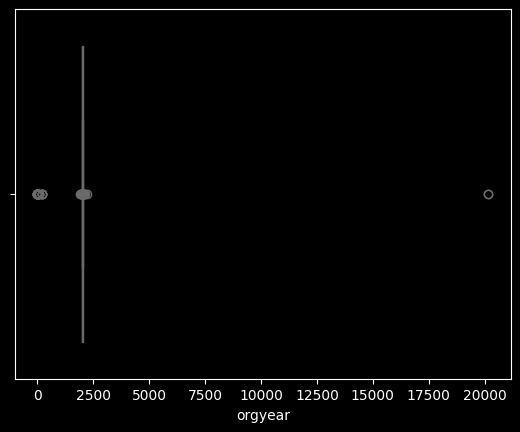

In [30]:
sns.boxplot(df1, x= 'orgyear')

In [37]:
valid_years= range(1900, 2025)
df1['orgyear'] = df1['orgyear'].apply(lambda x: x if x in valid_years else np.nan)

# Changing float datatype to datetime data type
df1['orgyear']= pd.to_datetime(df1['orgyear'], format= '%Y')
df1['orgyear']= df1['orgyear'].dt.year

In [38]:
df1.isna().sum()

company_hash            0
email_hash              0
orgyear               154
ctc                     0
job_position        36629
ctc_updated_year        0
dtype: int64

In [39]:
from sklearn.impute import KNNImputer

In [43]:
df1['job_position'].fillna('other', inplace= True)

knn_imputer = KNNImputer(n_neighbors= 5)
numerical_cols= ['orgyear']

df1[numerical_cols]= knn_imputer.fit_transform(df1[numerical_cols])

In [44]:
df1.isna().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

``` data is clean from here on```